Tid for bitonic_tsp: 0.4335184097290039


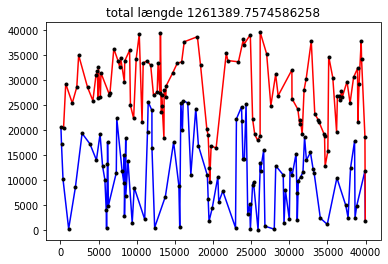

In [94]:
import matplotlib.pyplot as plt
from random import randint
from math import sqrt
from time import time

def generate_points(n):
    while True:
        points = [(randint(1, n ** 2), randint(1, n ** 2)) for _ in range(n)]
        xs = [x for (x, y) in points]

        if len(xs) == len(set(xs)):
            break
    return points

call_statistics = {}

def bitonic_tsp(points):
    start = time()
    
    '''Returner (samlet længde, A, B)
    
    hvor A = index på punkterne der ligger "øverst"
    og B = index på punkterne der ligger "nederst"
    
    Antager points sorteret fra venstre mod højre.
    '''
    
    def dist(i, j):
        px, py = points[i]
        qx, qy = points[j]
        
        return sqrt((px - qx) ** 2 + (py - qy) ** 2)
    
    answers = {}
    
    def solve(i, j):
        if (i, j) in answers:
            return answers[(i, j)]
        
        #print('solve:', i, j)
        call_statistics[(i, j)] = call_statistics.get((i, j), 0) + 1
        # if i == 0 and j == 0:
        if i == j == 0:
            answer = (0, [0], [0])
        elif i > j + 1:
            length, A, B = solve(i - 1, j)
            answer = (length + dist(i - 1, i), A + [i], B)
        elif i < j:
            length, A, B = solve(j, i)
            answer = (length, B, A)
        # i == j eller i == j + 1
        else:
            best_length = None
            best_A = None
            best_B = None
            for k in range(i):
                length, A, B = solve(k, j)
                length = length + dist(k, i)
                A = A + [i]
                if best_length == None or best_length > length:
                    best_length = length
                    best_A = A
                    best_B = B
            answer = (best_length, best_A, best_B)
        answers[(i, j)] = answer
        return answer
        
    n = len(points)
    answer = solve(n - 1, n - 1)
    
    end = time()
    
    print('Tid for bitonic_tsp:', end - start)
    
    return answer

points = sorted(generate_points(200))
# points = sorted(points)

length, A, B = bitonic_tsp(points)

#print(f'{length = }')
#print(f'{A = }')
#print(f'{B = }')

A_points = [points[a] for a in A]
B_points = [points[b] for b in B]

plt.plot(*zip(*A_points), '-b')
plt.plot(*zip(*B_points), '-r')

plt.plot(*zip(*points), 'k.')
plt.title('total længde ' + str(length))
plt.show()

Time passed in bitonic_tsp : 0.2969999313354492


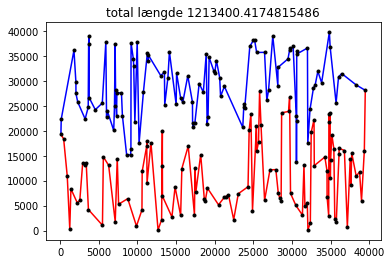

In [105]:
import matplotlib.pyplot as plt
from random import randint
from math import sqrt
from time import time
from functools import cache

def generate_points(n):
    while True:
        points = [(randint(1, n ** 2), randint(1, n ** 2)) for _ in range(n)]
        xs = [x for (x, y) in points]

        if len(xs) == len(set(xs)):
            break
    return points

call_statistics = {}

#def memoize(f):
#    answers = {}
#    
#    def wrapper(*args):
#        if args in answers:
#            return answers[args]
#        answer = f(*args)
#        answers[args] = answer
#        return answer
#    
#    return wrapper

def time_function(f):
    def wrapper(*args):
        start = time()
        answer = f(*args)
        end = time()
        print('Time passed in', f.__name__, ':', end - start)
        return answer
        
    return wrapper

@time_function
def bitonic_tsp(points):
    '''Returner (samlet længde, A, B)
    
    hvor A = index på punkterne der ligger "øverst"
    og B = index på punkterne der ligger "nederst"
    
    Antager points sorteret fra venstre mod højre.
    '''
    
    def dist(i, j):
        px, py = points[i]
        qx, qy = points[j]
        
        return sqrt((px - qx) ** 2 + (py - qy) ** 2)
    
    answers = {}
    
    @cache
    #@memoize
    def solve(i, j):
        call_statistics[(i, j)] = call_statistics.get((i, j), 0) + 1
        # if i == 0 and j == 0:
        if i == j == 0:
            return (0, [0], [0])
        elif i > j + 1:
            length, A, B = solve(i - 1, j)
            return (length + dist(i - 1, i), A + [i], B)
        elif i < j:
            length, A, B = solve(j, i)
            return (length, B, A)
        # i == j eller i == j + 1
        
        best_length = None
        best_A = None
        best_B = None
        for k in range(i):
            length, A, B = solve(k, j)
            length = length + dist(k, i)
            A = A + [i]
            if best_length == None or best_length > length:
                best_length = length
                best_A = A
                best_B = B
        return (best_length, best_A, best_B)
        
    n = len(points)
    answer = solve(n - 1, n - 1)
    
    return answer

points = sorted(generate_points(200))
length, A, B = bitonic_tsp(points)

for (idx, color) in [(A, 'b'), (B, 'r')]:
    plt.plot(*zip(*[points[a] for a in idx]), '-' + color)

plt.plot(*zip(*points), 'k.')
plt.title('total længde ' + str(length))
plt.show()